# Corona Patient Prediction Using Machine Learning : COVID-19

There’s currently no vaccine to prevent coronavirus disease (COVID-19). Day by day it’s increasing. Is it our job to protect ourselves. The disease causes respiratory illness (like the flu) with symptoms such as a cough, fever, and in more severe cases, difficulty breathing. I want to contribute at least a small to covid19 issue, so I decided to build a machine learning model that predicts corona patients based on the given data.

# What you learn in this case ?

1. Build a corona dataset with best features
2. Applying the machine learning models to predict COVID-19 patients
3. Turning Machine learning models hyperparameters .
4. Deploying our models thorugh Flask

I took a random data and arrange them properly. Here is my data set. 
I applied different conditions to arrange them properly.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [147]:
# Importing the dataset
df = pd.read_csv('COVID-19-Copy.csv')
df.head(10)

,age,fever,bodyPain,contactwithCOVIDPatient,soreThroat,coarsenessVoice,Cold,Headache,runnyNose,travelHistory,dryCough,diffBreath,infectionProb
0,26,-1,1,1,0,0,1,1,0,1,1,1,1
1,95,-1,-1,1,0,1,0,-1,1,0,1,1,1
2,37,1,-1,0,0,1,1,0,1,1,1,1,1
3,74,0,-1,0,0,0,1,0,1,1,1,-1,0
4,19,-1,0,1,0,1,1,1,1,1,1,0,0
5,51,-1,-1,1,1,1,0,1,0,1,0,0,0
6,26,0,0,0,0,1,1,1,1,0,1,-1,1
7,91,-1,0,0,1,1,0,-1,0,0,0,1,0
8,82,0,1,0,1,0,1,1,1,0,1,-1,1
9,7,0,1,1,0,0,1,-1,0,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 13 columns):
age                        7000 non-null int64
fever                      7000 non-null int64
bodyPain                   7000 non-null int64
contactwithCOVIDPatient    7000 non-null int64
soreThroat                 7000 non-null int64
coarsenessVoice            7000 non-null int64
Cold                       7000 non-null int64
Headache                   7000 non-null int64
runnyNose                  7000 non-null int64
travelHistory              7000 non-null int64
dryCough                   7000 non-null int64
diffBreath                 7000 non-null int64
infectionProb              7000 non-null int64
dtypes: int64(13)
memory usage: 711.0 KB


In [5]:
df.describe()

,age,fever,bodyPain,contactwithCOVIDPatient,soreThroat,coarsenessVoice,Cold,Headache,runnyNose,travelHistory,dryCough,diffBreath,infectionProb
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.00000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,50.530857,0.017000,0.003857,0.504429,0.49600,0.497429,0.502571,-0.007714,0.515000,0.506429,0.505714,-0.004286,0.500714
std,28.503714,0.815181,0.816400,0.500016,0.50002,0.500029,0.500029,0.813128,0.499811,0.499994,0.500003,0.814383,0.500035
min,1.000000,-1.000000,-1.000000,0.000000,0.00000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,26.000000,-1.000000,-1.000000,0.000000,0.00000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
50%,50.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,75.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,100.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

age                        0
fever                      0
bodyPain                   0
contactwithCOVIDPatient    0
soreThroat                 0
coarsenessVoice            0
Cold                       0
Headache                   0
runnyNose                  0
travelHistory              0
dryCough                   0
diffBreath                 0
infectionProb              0
dtype: int64

In [7]:
df['diffBreath'].value_counts()

 0    2358
-1    2336
 1    2306
Name: diffBreath, dtype: int64

1    3505
0    3495
Name: infectionProb, dtype: int64


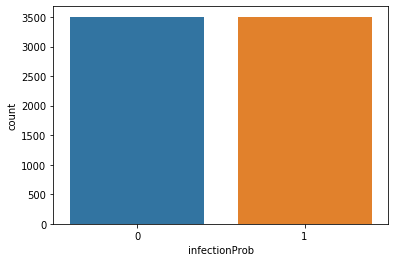

In [8]:
print(df['infectionProb'].value_counts())
sns.countplot(df.infectionProb)

# 1. How arranged this random data to predict properly : COVID-19

I used these 6 conditions, you can use more to predict more properly. Who are having fever, body pains, contact with COVID patient, sore throat, coarseness in voice, runny Nose, travel history, cough and breathing difficulty then they almost have corona.

# Condition – 1:

If someone satisfying these condition,

I applied the condition like below, they are simple you can understand them easily.

In [9]:
condition1 = (df['fever']==1) & (df['dryCough']==1) & (df['diffBreath']==1)


In [10]:
df['infectionProb'][condition1]=1

In [11]:
df[condition1]

,age,fever,bodyPain,contactwithCOVIDPatient,soreThroat,coarsenessVoice,Cold,Headache,runnyNose,travelHistory,dryCough,diffBreath,infectionProb
2,37,1,-1,0,0,1,1,0,1,1,1,1,1
32,19,1,-1,1,1,1,0,-1,0,1,1,1,1
96,99,1,1,0,1,0,1,0,0,0,1,1,1
100,74,1,1,1,0,1,1,0,0,0,1,1,1
118,80,1,0,1,1,1,1,0,1,0,1,1,1
121,77,1,0,1,0,1,1,0,1,0,1,1,1
134,71,1,1,1,0,0,0,1,1,1,1,1,1
166,45,1,1,1,0,0,0,-1,0,1,1,1,1
170,14,1,1,0,1,1,0,1,0,1,1,1,1
198,71,1,0,0,0,0,1,-1,1,1,1,1,1


# Condition – 2:

If someone satisfying these condition,

In [12]:
condition2 = (df['bodyPain']==1) | (df['fever']==1) & (df['runnyNose']==1) & (df['diffBreath']==1)


In [13]:
df['infectionProb'][condition2]=1

In [14]:
df[condition2]

,age,fever,bodyPain,contactwithCOVIDPatient,soreThroat,coarsenessVoice,Cold,Headache,runnyNose,travelHistory,dryCough,diffBreath,infectionProb
0,26,-1,1,1,0,0,1,1,0,1,1,1,1
2,37,1,-1,0,0,1,1,0,1,1,1,1,1
8,82,0,1,0,1,0,1,1,1,0,1,-1,1
9,7,0,1,1,0,0,1,-1,0,0,1,0,1
11,43,-1,1,1,1,1,1,0,0,0,1,1,1
13,95,0,1,0,1,1,0,-1,0,1,0,1,1
14,62,1,1,0,1,0,0,1,1,0,1,0,1
16,31,0,1,0,1,1,0,1,1,0,1,1,1
19,20,1,1,1,0,1,0,0,0,1,1,0,1
20,32,-1,1,1,1,0,0,0,1,0,1,-1,1


# Condition - 3:

In [15]:
condition3 =   (df['age']>60) & (df['fever']==0) & (df['contactwithCOVIDPatient']==1) | (df['travelHistory']==1)  & (df['diffBreath']==1) | (df['bodyPain']==1)


In [16]:
df['infectionProb'][condition3]=1

In [17]:
df[condition3]

,age,fever,bodyPain,contactwithCOVIDPatient,soreThroat,coarsenessVoice,Cold,Headache,runnyNose,travelHistory,dryCough,diffBreath,infectionProb
0,26,-1,1,1,0,0,1,1,0,1,1,1,1
2,37,1,-1,0,0,1,1,0,1,1,1,1,1
8,82,0,1,0,1,0,1,1,1,0,1,-1,1
9,7,0,1,1,0,0,1,-1,0,0,1,0,1
11,43,-1,1,1,1,1,1,0,0,0,1,1,1
13,95,0,1,0,1,1,0,-1,0,1,0,1,1
14,62,1,1,0,1,0,0,1,1,0,1,0,1
16,31,0,1,0,1,1,0,1,1,0,1,1,1
18,62,0,0,0,1,0,0,-1,1,1,0,1,1
19,20,1,1,1,0,1,0,0,0,1,1,0,1


# Condition : 4

In [18]:
condition4 = (df['fever']<1) & (df['dryCough']==0) & (df['diffBreath']<1) 


In [19]:
df['infectionProb'][condition4]=0

In [20]:
df[condition4]

,age,fever,bodyPain,contactwithCOVIDPatient,soreThroat,coarsenessVoice,Cold,Headache,runnyNose,travelHistory,dryCough,diffBreath,infectionProb
5,51,-1,-1,1,1,1,0,1,0,1,0,0,0
12,47,-1,0,1,0,0,0,1,0,1,0,-1,0
23,84,0,0,1,1,1,0,0,1,1,0,0,0
25,4,-1,-1,0,1,0,0,0,1,0,0,-1,0
27,68,-1,1,1,0,1,0,-1,1,0,0,0,0
29,51,0,-1,0,0,1,1,0,0,1,0,0,0
49,5,-1,1,1,0,1,1,0,0,0,0,-1,0
51,62,0,0,1,1,1,1,0,1,1,0,-1,0
60,6,0,1,0,1,1,0,-1,0,1,0,-1,0
66,21,-1,1,0,0,1,0,-1,1,1,0,0,0


# Condition : 5

In [21]:
condition5 = (df['bodyPain'] < 1) & (df['soreThroat']==0) & (df['runnyNose']==0) & (df['diffBreath']==0)


In [22]:
df['infectionProb'][condition5]=0

In [23]:
df[condition5]

,age,fever,bodyPain,contactwithCOVIDPatient,soreThroat,coarsenessVoice,Cold,Headache,runnyNose,travelHistory,dryCough,diffBreath,infectionProb
29,51,0,-1,0,0,1,1,0,0,1,0,0,0
31,36,0,0,0,0,0,0,-1,0,0,1,0,0
102,35,1,-1,1,0,0,1,-1,0,0,0,0,0
107,93,0,0,0,0,1,1,0,0,1,0,0,0
146,81,1,0,1,0,0,0,0,0,0,1,0,0
149,90,0,-1,0,0,0,1,0,0,0,0,0,0
151,63,-1,0,0,0,1,1,-1,0,1,0,0,0
153,41,0,-1,1,0,0,0,-1,0,1,1,0,0
174,45,0,-1,1,0,0,0,0,0,1,1,0,0
183,41,0,0,0,0,1,1,-1,0,0,1,0,0


# Condition : 6

In [24]:
condition6 = (df['contactwithCOVIDPatient']==0) & (df['Cold']==1) & (df['Headache']==1) & (df['coarsenessVoice']==1)


In [25]:
df['infectionProb'][condition6]=0

In [26]:
df[condition6]

,age,fever,bodyPain,contactwithCOVIDPatient,soreThroat,coarsenessVoice,Cold,Headache,runnyNose,travelHistory,dryCough,diffBreath,infectionProb
6,26,0,0,0,0,1,1,1,1,0,1,-1,0
36,60,1,0,0,1,1,1,1,1,1,1,-1,0
59,30,1,0,0,1,1,1,1,1,1,0,1,0
61,48,1,0,0,1,1,1,1,1,0,1,0,0
72,24,0,-1,0,0,1,1,1,1,0,0,0,0
86,80,-1,-1,0,0,1,1,1,1,1,0,1,0
155,67,0,-1,0,1,1,1,1,1,1,1,0,0
202,15,1,-1,0,1,1,1,1,1,1,1,0,0
235,7,0,1,0,0,1,1,1,0,0,0,0,0
238,92,-1,-1,0,0,1,1,1,0,1,1,1,0


# Train-Test Splitting

In [299]:
# This is only For learning purpose
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices]

In [25]:
train_set, test_set = split_train_test(df, 0.2)

[2215 2582 1662 ...  860 7603 7270]


In [26]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 6400
Rows in test set: 1600



In [27]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(df, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 6400
Rows in test set: 1600



Alright, we build good and valid data points to predict future infected patients using the machine learning model.

Now the target variable is like below, I know it is an unbalanced dataset. Don’t worry we will take care of that when we build our machine learning model.

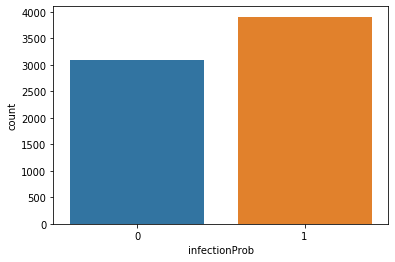

In [27]:
sns.countplot(df.infectionProb)

In [73]:
df['infectionProb'].value_counts()

1    3908
0    3092
Name: infectionProb, dtype: int64

In [74]:
X = df.iloc[:,0:-1].values

In [75]:
X

array([[26, -1,  1, ...,  1,  1,  1],
       [95, -1, -1, ...,  0,  1,  1],
       [37,  1, -1, ...,  1,  1,  1],
       ...,
       [75,  0, -1, ...,  0,  0,  1],
       [83,  1,  0, ...,  0,  0,  1],
       [52,  1, -1, ...,  0,  0, -1]], dtype=int64)

In [76]:
X.shape

(7000, 12)

In [77]:
Y = df.iloc[:,12].values

In [78]:
Y

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

# Data splitting

Now we are good to build a machine learning model that predicts corona patients earlier. Now we are going to split our data into train and test datasets.

We can use k-fold or stratified or shuffled split to split the data.

In [79]:
from sklearn.model_selection import StratifiedKFold,KFold,cross_val_score,ShuffleSplit,GridSearchCV
 
cv = StratifiedKFold(n_splits=5,random_state=42)
 
#kf = KFold(n_splits=5,random_state=100)
 
for train_index, test_index in cv.split(X,Y):
     
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
print(X_train.shape)
 
print(X_test.shape)

(5601, 12)
(1399, 12)


# 2.Building a corona patient prediction machine learning model

Now we are good to go to build a machine learning model that predicts corona patient prediction.

I used 3 classical machine learning algorithms which are good to handle unbalanced datasets. Those are
1) Logistic Regression
2) Decision Tree classifier
3) Random forest classifier

# Corona Patient Prediction using Logistic regression model

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
 
# Logistic Regression
 
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test,lr_pred)
print(lr_acc)
 
 
 
cv_scores = cross_val_score(lr,X,Y,cv=cv)
 
print(cv_scores)

0.7533952823445318
[0.73875803 0.74660956 0.745      0.76411723 0.75339528]


By using the logistic regression model to this data I got 75% accuracy, its actually a good accuracy. I tried training accuracy that also not fine, we are not overfitting or underfitting.



[[461 157]
 [188 593]]


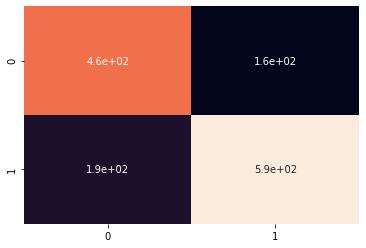

In [81]:
lr_cm = confusion_matrix(y_test,lr_pred)
print(lr_cm)
lr_df = pd.DataFrame(data=lr_cm,columns=['0','1'],index=['0','1'])
sns.heatmap(lr_df,annot=True,cbar=False)
plt.show()

# Corona Patient Prediction using Decision Tree classifier model

In [86]:
tr = DecisionTreeClassifier(class_weight='balanced')
tr.fit(X_train,y_train)
tr_pred = tr.predict(X_test)
tr_acc = accuracy_score(y_test,tr_pred)
print(tr_acc)
 
# Tree 
cv_sccores = cross_val_score(tr,X,Y,cv=cv)
print(cv_scores)

0.8263045032165832
[0.73875803 0.74660956 0.745      0.76411723 0.75339528]


In [87]:
df.columns

Index(['age', 'fever', 'bodyPain', 'contactwithCOVIDPatient', 'soreThroat',
       'coarsenessVoice', 'Cold', 'Headache', 'runnyNose', 'travelHistory',
       'dryCough', 'diffBreath', 'infectionProb'],
      dtype='object')

In [88]:
tr.predict([[70,1,0,1,0,1,0,0,0,1,1,1]])[0]

1

In [89]:
tr.predict_proba([[70,1,0,1,0,1,0,0,0,1,1,1]])[0][1]

1.0

In [90]:
tr.predict([[30,-1,1,0,0,0,0,0,0,1,0,-1]])[0]

0

In [91]:
tr.predict_proba([[30,-1,1,0,0,0,0,0,0,1,0,-1]])[0][1]

0.0

In [92]:
df.columns

Index(['age', 'fever', 'bodyPain', 'contactwithCOVIDPatient', 'soreThroat',
       'coarsenessVoice', 'Cold', 'Headache', 'runnyNose', 'travelHistory',
       'dryCough', 'diffBreath', 'infectionProb'],
      dtype='object')

[[496 122]
 [121 660]]


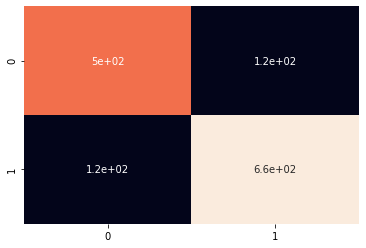

In [93]:
tr_cm = confusion_matrix(y_test,tr_pred)
print(tr_cm)
tr_df = pd.DataFrame(data=tr_cm,columns=['0','1'],index=['0','1'])
 
sns.heatmap(tr_df,annot=True,cbar=False)
plt.show()

By using the Decision Tree classifier model to this data I got 83% accuracy, its a really good accuracy. I tried training accuracy that also fine, we are not overfitting or underfitting.

# Corona Patient Prediction using Random Forest classifier model

In [108]:
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test,rfc_pred)
print(rfc_acc)
print('\n') 
# Random Forest Classifier
cv_sccores = cross_val_score(rfc,X,Y,cv=cv)
print(cv_scores)

0.8227305218012866


[0.73875803 0.74660956 0.745      0.76411723 0.75339528]


[[513 105]
 [143 638]]




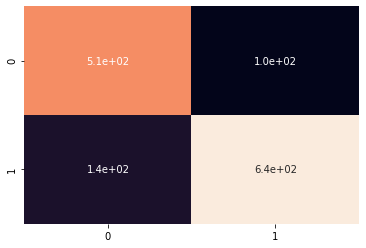

In [109]:
rfc_cm = confusion_matrix(y_test,rfc_pred)
print(rfc_cm)
print('\n')
rfc_df = pd.DataFrame(data=rfc_cm,columns=['0','1'],index=['0','1']) 
sns.heatmap(rfc_df,annot=True,cbar=False)
plt.show()

By using the Random Forest classifier model to this data, I got almost same 82% accuracy, it is also good accuracy. 

# 3. Tuning machine models hyperparameters 

I am giving a super-simplified function, you can use anywhere you want wherever you need to tune your hyperparameters of your machine learning models.

In [122]:
def find_best_model(X,Y):
    algos = {
        
        'logistic_reg':{
            'model':LogisticRegression(class_weight='balanced'),
        'params' :{
            'penalty':['l1','l2'],
            'C':[0.0001,0.001,0.01,0.1,1.0,10,100,1000]
        }
    },
        
    'DT_clf':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini', 'entropy'],
            'max_depth': [2,4,6,8,12]
        }
    }
    }
    
    
    scores =[]
    
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=567)
    
    for algo_name,config in algos.items():
        gd = GridSearchCV(config['model'],param_grid=config['params'],cv=cv,return_train_score=False)
        gd.fit(X,Y)
        
        scores.append({
            'model':algo_name,
            'best_score':gd.best_score_,
            'best_params':gd.best_params_
            
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

It will return a data frame that consists of the model name and best parameters and scores.

In [123]:
find_best_model(X_train,y_train)

,model,best_score,best_params
0,logistic_reg,0.752364,"{'C': 0.1, 'penalty': 'l2'}"
1,DT_clf,0.841748,"{'criterion': 'entropy', 'max_depth': 8}"


After Tuning models, here accuracy increased. I got 84% accuracy of Decision Tree Classifier. Its a really good accuracy.
So here the winner is the Decision tree classifier, now its time to build our final machine learning model that predicts corona (covid19) infected patients.

In [124]:
dt_clf  = DecisionTreeClassifier(criterion='gini',max_depth=6,class_weight='balanced')
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [125]:
y_pred = dt_clf.predict(X_test)

In [126]:
accuracy_score(y_test,y_pred)

0.812723373838456

In [127]:
tr_cm = confusion_matrix(y_test,y_pred)
tr_cm

array([[523,  95],
       [167, 614]], dtype=int64)

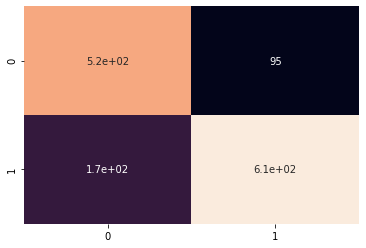

In [128]:
tr_df = pd.DataFrame(data=tr_cm,columns=['0','1'],index=['0','1'])
tr_df
sns.heatmap(tr_df,annot=True,cbar=False)
plt.show()

In [129]:
df.head(10)

,age,fever,bodyPain,contactwithCOVIDPatient,soreThroat,coarsenessVoice,Cold,Headache,runnyNose,travelHistory,dryCough,diffBreath,infectionProb
0,26,-1,1,1,0,0,1,1,0,1,1,1,1
1,95,-1,-1,1,0,1,0,-1,1,0,1,1,1
2,37,1,-1,0,0,1,1,0,1,1,1,1,1
3,74,0,-1,0,0,0,1,0,1,1,1,-1,0
4,19,-1,0,1,0,1,1,1,1,1,1,0,0
5,51,-1,-1,1,1,1,0,1,0,1,0,0,0
6,26,0,0,0,0,1,1,1,1,0,1,-1,0
7,91,-1,0,0,1,1,0,-1,0,0,0,1,0
8,82,0,1,0,1,0,1,1,1,0,1,-1,1
9,7,0,1,1,0,0,1,-1,0,0,1,0,1


# High Risk

In [130]:
dt_clf.predict([[70,1,0,1,0,1,0,0,0,1,1,1]])[0]

1

# Low Risk

In [131]:
dt_clf.predict([[30,-1,1,0,0,0,0,0,0,0,0,0]])[0]

0

# Precision, Recall and F1-score check:

We never miss a patient who needs a medical diagnosis. so we must improve F1-score.

In [132]:
from sklearn.metrics import f1_score,precision_score,recall_score
f1_score(y_test,y_pred)

0.8241610738255034

In [133]:
precision_score(y_test,y_pred)

0.8660084626234132

In [134]:
recall_score(y_test,y_pred)

0.7861715749039693

Here we improve the Precision and recall.so it is useful to avoid false negatives.

# Positive Prediction Check

In [148]:
model.predict([[30,1,1,0,1,0,1,0,0,1,0,1]])[0]

1

# Negative Prediction Check

In [149]:
model.predict([[30,-1,0,0,0,0,0,0,0,0,0,0]])[0]

0

# 4. Exporting Machine learning Model & Deploying

Its time to export our machine learning model to deploy online. so here we use the python pickle module to export.

In [135]:
import pickle

In [136]:
with open('corona.pkl','wb') as f:
    pickle.dump(dt_clf,f)

In [137]:
pickle_in = open("corona.pkl","rb")
model = pickle.load(pickle_in)

In [138]:
model.predict([[30,1,1,0,1,0,1,0,0,1,0,1]])[0]

1

In [139]:
model.predict([[30,-1,0,0,0,0,0,0,0,0,0,0]])[0]

0

In [140]:
model.predict_proba([[70,1,0,1,0,1,0,0,0,1,1,1]])[0]

array([0., 1.])

In [141]:
model.predict_proba([[30,-1,1,0,1,0,0,0,0,1,0,1]])[0]

array([0., 1.])

In [142]:
model.predict_proba([[30,-1,1,0,1,0,1,0,0,1,0,0]])[0]

array([1., 0.])

In [143]:
df.columns

Index(['age', 'fever', 'bodyPain', 'contactwithCOVIDPatient', 'soreThroat',
       'coarsenessVoice', 'Cold', 'Headache', 'runnyNose', 'travelHistory',
       'dryCough', 'diffBreath', 'infectionProb'],
      dtype='object')

In [144]:
model.predict([[20,1,-1,0,0,0,0,0,0,0,0,1]])[0]

0

In [145]:
model.predict_proba([[20,1,-1,0,0,0,0,0,0,0,0,1]])[0][1]

0.42841887536678064

Finally, we build a machine learning model that predicts corona patients who are infecting in the future.
I deployed this machine learning model using flask.